Exercise 4

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber1: int
    number3: int    
    operation2: str
    number4: int
    finalNumber2: int
    

In [16]:
def adder(state: AgentState) -> AgentState:
    """This function adds the two numbers in the state."""
    print("ADDER1")
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This function subtracts the second number from the first."""
    state['finalNumber1'] = state['number1'] - state['number2']
    print("SUBSTRACTER1")
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """Decides which operation to perform next based on the first operation."""
    if state['operation1'] == 'add':
        return "addition_operation"
    elif state['operation1'] == 'subtract':
        return "subtraction_operation"
    else:
        raise ValueError("Invalid operation1 value. Must be 'add' or 'subtract'.")

def adder2(state: AgentState) -> AgentState:
    """This function adds the two numbers in the state."""
    print("ADDER2")
    state['finalNumber2'] = state['number3'] + state['number4']
    print(state['finalNumber2'])
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This function subtracts the second number from the first."""
    state['finalNumber2'] = state['number3'] - state['number4']
    print(state['finalNumber2'])
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    """Decides which operation to perform next based on the second operation."""
    if state['operation2'] == 'add':
        print("ADD2")
        return "addition_operation2"
    elif state['operation2'] == 'subtract':
        print("SUBTRACT2")
        return "subtraction_operation2"
    

In [17]:
stateGraph = StateGraph(AgentState)

stateGraph.add_node("add_node1", adder)
stateGraph.add_node("subtract_node1", subtractor)
stateGraph.add_node("router1", lambda state: state)

stateGraph.add_node("add_node2", adder2)
stateGraph.add_node("subtract_node2", subtractor2)
stateGraph.add_node("router2", lambda state: state)

stateGraph.add_edge(START, "router1")

stateGraph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        # Edges based on the first operation
        "addition_operation": "add_node1",
        "subtraction_operation": "subtract_node1"
    }    
)

stateGraph.add_edge("add_node1", "router2")
stateGraph.add_edge("subtract_node1", "router2")

stateGraph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {    
        "addition_operation2": "add_node2",    
        "subtraction_operation2": "subtract_node2"    
    }    
)            


stateGraph.add_edge("add_node2", END)
stateGraph.add_edge("subtract_node2", END)

app = stateGraph.compile()

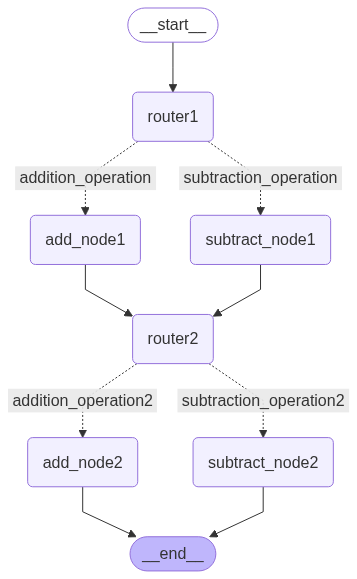

In [18]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))
# Run the application

In [19]:
initial_state = AgentState(
    number1=5,
    operation1='add',
    number2=3,
    finalNumber1=0,
    number3=10,
    operation2='subtract',
    number4=4,
    finalNumber2=0
)

In [20]:
print(app.invoke(initial_state))
# Display the final state

ADDER1
SUBTRACT2
6
{'number1': 5, 'operation1': 'add', 'number2': 3, 'number3': 10, 'operation2': 'subtract', 'number4': 4, 'finalNumber2': 6}
